# Ex1 - Raz Bareli

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.a

In [13]:
dataset = pd.read_csv("ex1.csv")
dataset.head()

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,...,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
0,0,137007,2016-07-23,Utah,Draper,12300 South,0,1,4.0,NaN,...,Man wanted for prior agg asault shot self in h...,0::30,0::Adult 18+,0::Male,0::Eddie Heuser,NaN,0::Injured,0::Subject-Suspect,51.0,11.0
1,1,49807,2014-12-13,-1,Chicago,10400 block of South State Street,-1,0,2.0,0::Unknown,...,"Man shot, drive-by;",0::26,0::Adult 18+,0::Male,0::Tyrece L. Stornes,NaN,0::Killed,0::Victim,28.0,14.0
2,2,2318,2014-01-15,south carolina,Irmo,1 Forest Walk Court,4,0,2.0,NaN,...,NaN,0::28||1::3||2::1||3::38,0::Adult 18+||1::Child 0-11||2::Child 0-11||3:...,0::Female||1::Male||2::Female||3::Male,0::Kia Miller||1::Kyler Devane Miller||2::Syra...,3::Family,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,73.0,19.0
3,3,237635,2018-03-18,-1,Detroit,5600 BLOCK OF JOHN C LODGE FWY,0,0,NaN,0::Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,238068,2018-03-21,Michigan,Benton Harbor,1200 block of Parkway Dr,0,0,6.0,0::Stolen,...,"raid, drug, stolen handgun",0::34||1::39||2::31||3::47,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male,0::Sylvester Davis III||1::Leonard Robinson||2...,NaN,"0::Unharmed, Arrested||1::Unharmed, Arrested||...",0::Subject-Suspect||1::Subject-Suspect||2::Sub...,79.0,21.0


Categorical features are features that can be divided into different categories, for example: state, city_or_country, participant_gender, participant_age_group.
Ordinal features are features that are categorical but with a certain hierarchy between the categories, and I couldn't find such in the database.
The continues features are: Latitude, longitude, participants_age.

### 1.b
I've chosen state and gender (the gender data is very messy so the graph does not make much sense...)

/usr/lib/python3/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


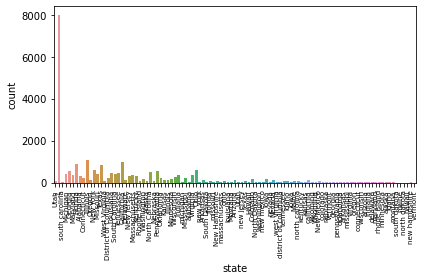

In [14]:
ax = sns.countplot('state',data=dataset)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=7)
plt.tight_layout()
plt.show()

In [15]:
dataset['state'].value_counts().shape[0]

103

/usr/lib/python3/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='participant_gender', ylabel='count'>

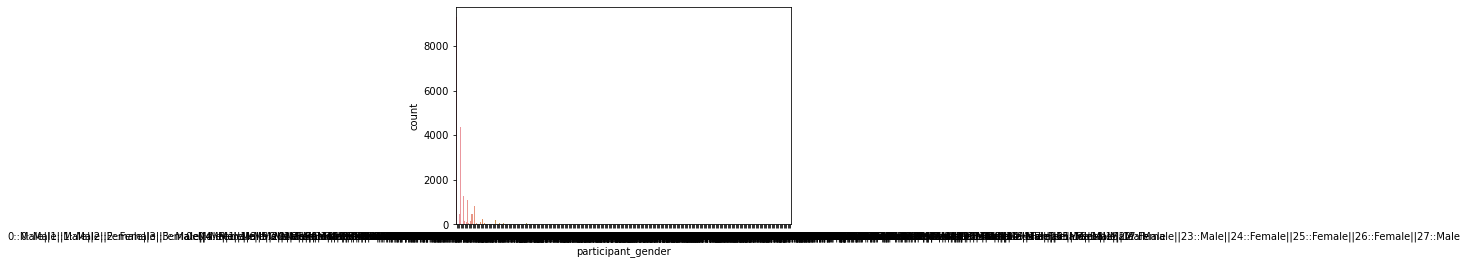

In [16]:
sns.countplot('participant_gender',data=dataset)

In [17]:
dataset['participant_gender'].value_counts().shape[0]

251

for the state feature, we have 103 unique features and for the gender we have 251. That's of course something we should address, since we expect to have 2 categories in "gender" and 52 in "state".
Both are far from being uniformly distributed - there are much more male values than women, and some states appear more times than others.

### 2.a
yes, most of the columns have null values, as we can see below:

In [18]:
dataset.isna().sum()

Unnamed: 0                      0
incident_id                     0
date                            0
state                           0
city_or_county                  0
address                      1640
n_killed                        0
n_injured                       0
congressional_district       1187
gun_stolen                   9952
gun_type                     9950
incident_characteristics       29
latitude                      629
location_description        19817
longitude                     775
n_guns_involved              9950
notes                        7967
participant_age              9203
participant_age_group        4185
participant_gender           3599
participant_name            12332
participant_relationship    22365
participant_status           2784
participant_type             2523
state_house_district         3953
state_senate_district        3285
dtype: int64

In [19]:
for column in dataset:
    dataset[column] = dataset[column].fillna(dataset[column].mode()[0])

### 2.b
1) in the column n_killed there are negative values, which doesn't make any sense. we can try and fix them with the data of column 'incident_characteristics'. we'll see if the word 'dead' appears there, if it does - well change the value to 1, else to zero. This is of course not ideal, but better than to leave it with negative values.

In [20]:
dataset.loc[((dataset['n_killed'] < 0) & (dataset['incident_characteristics'].str.contains('Dead', regex=True))), ['n_killed']] = 1
dataset.loc[dataset['n_killed'] < 0, ['n_killed']] = 0

dataset.loc[((dataset['n_injured'] < 0) & (dataset['incident_characteristics'].str.contains('Injured', regex=True))), ['n_injured']] = 1
dataset.loc[dataset['n_injured'] < 0, ['n_injured']] = 0
dataset['n_injured'].value_counts()



0     14441
1      8842
2       528
3       110
4        31
5        10
6         2
14        1
9         1
7         1
Name: n_injured, dtype: int64

2) The latitude column contains strings. well change it to zero instead, so we will have integers for all entries.

In [21]:
dataset.loc[dataset['latitude'].str.contains('man', regex=True), ['latitude']] = "0"
dataset.latitude

0        40.5268
1              0
2              0
3              0
4              0
          ...   
23962          0
23963    27.6784
23964    42.4261
23965    34.4736
23966    27.7556
Name: latitude, Length: 23967, dtype: object

3) the longtitude contains illegal values, that means, values outside the range [-180, 180]. we'll change it to zero instead like we did in latitude

In [22]:
dataset.loc[(dataset['longitude'] > 180) | (dataset['longitude'] < -180) , ['longitude']] = 0
dataset.longitude

0       -111.9020
1        -87.6235
2        -81.1525
3        -76.6200
4        -86.4288
           ...   
23962    -88.4467
23963      0.0000
23964    -82.9528
23965   -117.3620
23966    -82.6948
Name: longitude, Length: 23967, dtype: float64

### 3.a
We'll plot the amount of crimes per month, as well as the number of people killed each month - which will indicate the severeness of the crimes. In my opinion this is the most indicative parameter for the severeness of a crime, but of course, it's just my opinion (the n_injured feature does not include the killed people, only the injured)
It looks like the amount of crimes is uniform throughout the time, with no apparent increase, as well as the severeness of those crimes.

Text(0.5, 1.0, 'Crimes over time')

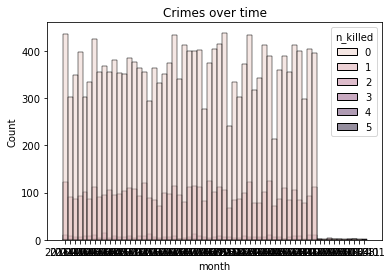

In [23]:
def delete_day(x):
    return x[:-3]

dataset['month'] = dataset['date'].apply(delete_day)
sns.histplot(data=dataset,x='month', hue='n_killed').set_title("Crimes over time")

### 3.b
I've chosen to plot the number of crimes in each country. I think it's a good separation since each state has its own laws and orders, and its own type of people (more or less...), so it's interesting to see the trend in that matter.
A disadvantage to that might be the fact that we are not separating between other factors, for example - crimes in the city or in the suburbs, etc.
From the data below we can see that we do have more dangerous states than others, for sure.
When looking at the number of injuries, the trend does not change at the 3 most dangerous countries - we can see that they also have the most injuries of all countries. If we look further, we can see that there are states where while they don't have as many crimes as in other states - they do have more injuries. So I guess that the trend is changing in some areas, and stays the same in the extremes.

Illinois      1089
California     995
Florida        893
Texas          850
New York       620
Name: state, dtype: int64

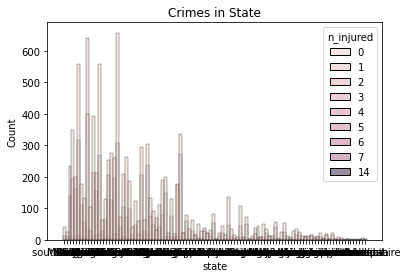

In [24]:
dateset_without_negative_states = dataset[dataset['state'] != '-1']
sns.histplot(data=dateset_without_negative_states,x='state', hue='n_injured').set_title("Crimes in State")
dateset_without_negative_states['state'].value_counts()[:5]

### 4.a
We'll do one hot encoding for state and gender, and check the correlation using a heatmap.
To make this a bit more rational, since the gender feature has 251 different values, I’ll process the gender feature to be a bit more realistic, just so we could learn something from the heatmap:


<AxesSubplot:>

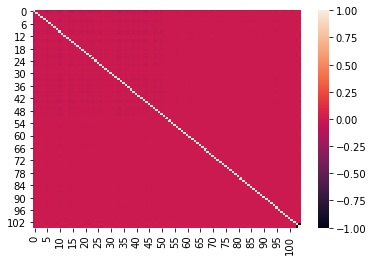

In [25]:
from sklearn.preprocessing import OneHotEncoder
dataset.loc[dataset['participant_gender'].str.contains('Female', regex=True), ['participant_gender']] = "Female"
dataset.loc[~dataset['participant_gender'].str.contains('Female', regex=True), ['participant_gender']] = "Male"
encode = OneHotEncoder().fit_transform(dataset[['state','participant_gender']]).toarray()
sns.heatmap(pd.DataFrame(encode).corr())

Since most of the map is pink, it seems that there is no apparent correlation between the new features. That means, the fact female commits a crime, does not help us estimate where this crime would be in the US.

### 4b
A very simple heuristic can be based on the number of guns involved with a combination of the more dangerous states we found in question 3b.
From the data we can see that the common number of injured people vary from 0 to 5, and above that is quite rare. So, we can divide the states to 6 categories based on their "dangerousness", and add a factor of the number of guns involved:

In [26]:
# we'll ignore cells with -1 in them
states = dateset_without_negative_states['state'].value_counts()
# normalize the results
states = states / states[0]
# map each country to its danger score
def danger_mapping(state):
    if state < 0.16:
        return 0
    elif 0.16 < state < 0.33:
        return 1
    elif 0.33 < state < 0.49:
        return 2
    elif 0.49 < state < 0.66:
        return 3
    elif 0.66 < state < 0.83:
        return 4
    else:
        return 5
states = states.apply(danger_mapping)
# prediction function:
def predict(state):
    return states[state]


In [27]:
# now for the prediction:
dateset_without_negative_states['predicted_n_injuries'] = dateset_without_negative_states['state']
dateset_without_negative_states['predicted_n_injuries'] = dateset_without_negative_states['predicted_n_injuries'].apply(predict)
dateset_without_negative_states[['predicted_n_injuries', 'n_injured']]

<ipython-input-27-39623d242775>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dateset_without_negative_states['predicted_n_injuries'] = dateset_without_negative_states['state']
<ipython-input-27-39623d242775>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dateset_without_negative_states['predicted_n_injuries'] = dateset_without_negative_states['predicted_n_injuries'].apply(predict)


,predicted_n_injuries,n_injured
0,0,1
2,0,0
4,2,0
5,3,0
6,2,1
...,...,...
23959,1,0
23962,1,0
23964,2,1
23965,5,0


In [28]:
# let's check how well we predicted (in percent):
prediction = dateset_without_negative_states['predicted_n_injuries']
true_values = dateset_without_negative_states['n_injured']
print(np.round(sum(prediction == true_values) / len(prediction) * 100), '%')

20.0 %


Seems like we've predicted correct for 1 out of 5 cases. This was a very, very simple "model" so I guess it's not too bad.